# Perceptron
---
**Introductory Note:**

Hello everyone!

I decided to try out a code for building [Rosenblatt perceptron](https://pubmed.ncbi.nlm.nih.gov/13602029) in Python, which I found in the second chapter of [Python Machine Learning, 3rd EditionPython Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition) by Sebastian Raschka and Vahid Mirjalili. I recommend that book to everyone who wants to get a deep insight into Machine Learning and scientific computing in Python. Except for perceptron code, you can find notes I took from that chapter and function that helps visualize perceptron performance.
 Since I used book translation, I might make a few mistakes in the translation especially, when it comes to mathematical terms.

[Bart1280](https://github.com/Bartosz1280)

---
## Formal definition

In mathematical terms an **artificial neuron** can be seen as a mean to solve binary classification problems with two possible classes:
* **Positive class** ($1$)
* **Negative class** ($-1$)

Next we define the **decision function** $\phi(z)$ which is a linear combination of:
* **Input values** ($x$)
* **Weights vector** ($w$)

Where:
 $z$ is a total system activation.

$$
z=w_1x_1+w_2x_2+...+w_mx_m
$$

Which is the same as:

$$
w=\begin{bmatrix}
w_1\\
\vdots\\
w_m\\
\end{bmatrix},
$$
$$
x=\begin{bmatrix}
x_1\\
\vdots\\
x_m\\
\end{bmatrix}
$$

If the neuron excitation is higher than the *threshold-value $\theta$*, the object belongs to the positive class, otherwise, it belongs to the negative class. Decision function in perceptron function $\phi(.)$ is a variation of **unit step function** in which:

$$
\begin{equation}
\phi(z) = 
\left\{
    \begin{array}{lr}
        1\text{ if }z\geq\theta \\
        -1\text{ if }z<\theta 
    \end{array}
\right\}
\end{equation}
$$

Equation can be simplified by moving $\theta$ to its left side and defing initial weight as $w=-\theta$ adn $x_0=1$.

Thanks to that the systems activatiomn $z$ will have following equation:

$$
z=w_0x_0+w_1x_1+...+w_mx_m=w^Tx
$$

Where:
$$
\begin{equation}
\phi(z) = 
\left\{
    \begin{array}{lr}
        1\text{ if }z\geq0 \\
        -1\text{ if }z<0
    \end{array}
\right\}
\end{equation}
$$

$w^T$ stands for *the transposition*

Negative weight value ( $w_0=-\theta$) is call the **bias unit**

### Recap on scalar product and transpose matricies
Below you can find a short recap on scalar product and transpose matricies:

In [9]:
import numpy as np
# Multiplication of transpose matricies
w = np.array([1,2,3]) #1x3 array
x = np.array([4,5,6]) #1x3 array
np.matmul(w.transpose(),x) #W(Transpose) * x


32

In [10]:
# The same calculation can be written in the following way:

w = np.array([1,2,3]) #1x3 array
x = np.array([4,5,6]) #1x3 array

matmul_result = 0 # matricies multiplication result
for i in zip(w.tolist(),x.tolist()): # np.array is not iterrable
    w,x = i
    matmul_result += w*x # multiply each element and add it to the results
matmul_result


32


## Principles of perceptron learning
---
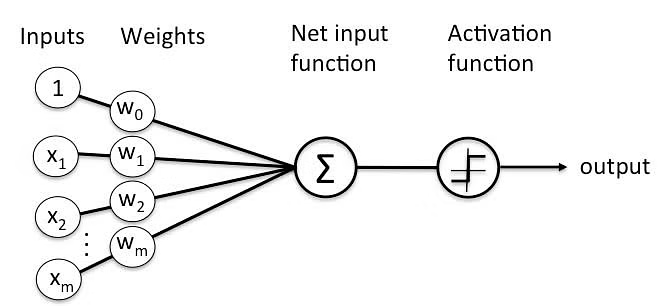

The mechanism of a simple perceptron model can either be active or not the neuron. Cause of that only binary output is possible. The learning algorithm of the simple perceptron contains the following steps:
* Input values of 0 or small, random numbers as weights
* For each learning example $x^{(i)}$:
  * a) Calculate output value $\hat{y}$
  * b) Update weights


In the case of classification, the output value is a data label, predicted by the step unit function. Simultaneous actualization of each $\omega_jw$  weights in vector $\omega$ is calculated with a function:

$$
w_j:=w_j+\Delta w_j
$$

The value of weight actualization (or its change) - $\omega_j$ is calculated with **the rule of perceptron learning** :

$$
\Delta w_j=\eta(y^{(i)}-\hat{y^{(i)}})x^{(i)}{_j}
$$

Where:
* $\eta$ - **learning rate** value ( most often the constant value between 0 and 1)
* $y^{i}$ - real label
* $\hat{y}^{(i)}$ - predicted label


$\hat{y}^{(i)}$  values are not updated until all weights are not updated.

Vales actualization for two-dimensional dataset can be written as:

$$
\Delta w_0=\eta(y^{(i)}-\text{output}^{(i)})
$$
$$
\Delta w_1=\eta(y^{(i)}-\text{output}^{(i)})x^{(i)}{_1}
$$
$$
\Delta w_2=\eta(y^{(i)}-\text{output}^{(i)})x^{(i)}{_2}
$$

The $\delta w_0$ is a bias unit and $x^{(i)}{_n}$ is an input value.



When the label was correctly predicted the $\Delta w_j$ equals $0$

$$
y^{(i)}=-1 \quad \hat{y}^{(i)}=-1 \quad \quad\Delta w_j = \eta(-1-(-1))x^{(i)}_j=0
$$

$$
y^{(i)}=1 \quad \hat{y}^{(i)}=1 \quad \quad\Delta w_j = \eta(1-1)x^{(i)}_j=0
$$

When the label was not correctly predicted the $\Delta w_j$ is shifted towards target values

$$
y^{(i)}=1 \quad \hat{y}^{(i)}=-1 \quad \quad\Delta w_j = \eta(1-(-1))x^{(i)}_j=\eta(2)x^{(i)}_j
$$

$$
y^{(i)}=-1 \quad \hat{y}^{(i)}=1 \quad \quad\Delta w_j = \eta(-1-1)x^{(i)}_j=\eta(-2)x^{(i)}_j
$$

Perceptron convergence is ensured only if classes are linearly separable and the learning rate is low enough. If classes are not separable that way we can set the maximal iterations scale of the algorithm and (or) tolerance of not correct classification. Otherwise, perceptron continues updating weight infinitely.

## Perceptron Model in Python
---

In [11]:
import numpy as np

class Perceptron(object):
    """
    Perceptron classificator
    ----------
    eta: float
        Learning rate from 0 to 1
    n_iter: int
        Number of algorithm data iteration
    random_state: int
        Seed for random generator for initialization
        of random weights
    
    Atributes
    ----------
    w_: one-dimensional table
        adjusted weights
    errors_: list
        Number of wrongly classified data in ervery iteration
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        Parameters:
        --------
        X: {table-like}, dimension = [n_examples,n_features]
            Learning vectors, where n_examples is the number of examples
            and n_features is the number of features.
        Y: {table-like}, dimension = [n_examples]
            Target values
        
        Returns
        -------
        self
        """
        rgen = np.random.RandomState(self.random_state) # NumPy specific random seed conteiner
        self.w_ = rgen.normal( # Draw a number from the normal distribution
            loc = 0.0, # Center of the distribution
            scale = 0.01, # Standard deviation
            size = 1 + X.shape[1]) # Shape of the product: 1 + number of columns
        
        self.errors_= list()
        
        # Iteration throught the data
        for _ in range(self.n_iter): # Maximal number of iteration defined in parameters
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi)) #Delta(w)
                self.w_[1:] += update *xi
                self.w_[0]  += update # Bias : Delta(w)0
                errors += int(update != 0.0) # Detects error when the update is not 0
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """
        Calculates the total extication
        """
        return np.dot(X, self.w_[1:]) + self.w_[0] # Scalar product of bias and weights
    
    def predict(self,X):
        """
        Returns class label after calculating the step-unit function
        """
        return np.where(self.net_input(X) >= 0.0,1,-1)
    

The code above allows us to initiate a `Perceptron` object with initial random weights. Weights cannot equal zero since the $\eta$ coefficient can only influence the classification when the initial weights are different from zero. If initiated weights are equal to zero, only the vector scale can be changed not the true direction.


----
## Dataset

For the assessment of perceptron, classification we will use the *iris* dataset from https://archive.ics.uci.edu. The original rows of the iris dataset contain 50 individuals from 3 different labels. For perceptron training, we will use two classes: *Serosa*, and *Vesicolor* (first 100 rows). Before starting perceptron training we will asses the dataset visually.
The code above allows us to initiate a `Perceptron` object with initial random weights. Weights cannot equal zero since the $\eta$ coefficient can only influence the classification when the initial weights are different from zero. If initiated weights are equal to zero, only the vector scale can be changed not the true direction.

In [12]:
import os 
import pandas as pd

s = os.path.join('https://archive.ics.uci.edu','ml','machine-learning-databases','iris','iris.data')
df_iris = pd.read_csv(s,header=None,encoding='utf-8')
df_iris.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


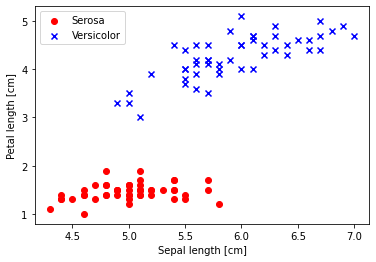

In [13]:
import matplotlib.pyplot as plt
# Original rows of iris dataset contains 50 individuals from 3 different labels.
# For perceptron training we will use two classes: Serosa, Vesicolor 
# These classes are first 100 rows of dataset

y = df_iris.iloc[0:100,4] # Grabs first 100 rows and the fourth column with labels

# Assigned numerical values of -1 for Iris-setosa and 1 for Iris-vesicolor
# Returns an array of -1 and 1 values
y = np.where( y == 'Iris-setosa', -1, 1) 

# Sepal and petal lenghts of the first 100
# Returns an array
X = df_iris.iloc[0:100, [0,2]].values

# Plotting data
plt.scatter(X[:50, 0], X[:50,1],
           color='red',marker='o',label='Serosa'
           )
plt.scatter(X[50:100,0], X[50:100,1],
           color='blue',marker='x',label='Versicolor'
           )
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


The scatter plot above shows that both iris species are separable linearly. The perceptron should be capable of classifying each individual correctly after several iterations.

As mentioned  $\eta$ (`eta`) stands for learning rate. This value will be set to 0.1 (always should be a value between 0 and 1). The maximal number of iterations will be set to 10.

Next, we will examine the efficiency of the learning process using plots.

In [14]:
# Intialize perceptron instance with:
#  learning rate = 0.1
#  10 numbers of iteration during learning
ppn = Perceptron(eta=0.1, n_iter=10)
# Start learning (fitting data) on :
# Sepal length (X)
# Petal length (y)
ppn.fit(X,y)


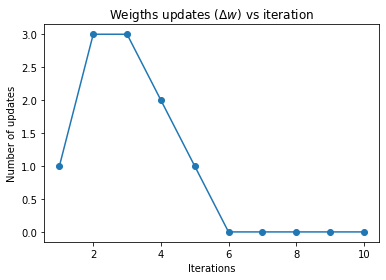

In [15]:
# Plot learning rate

plt.plot(
    range(1,len(ppn.errors_)+1), # Number of iterations passes as range object
    ppn.errors_, # List containg weight update value in the current iteration
    marker='o'
)
plt.xlabel("Iterations")
plt.ylabel("Number of updates")
smt = r'$\Delta w$' # Latex string for the title
plt.title(f"Weigths updates ({smt}) vs iteration")
plt.show()


After the 5th iteration, perceptron stopped updating weights.

This kind of graph assesses the perceptron learning rate.

Now we will visualize the actual classification done by the model.

In [46]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.01):
    """
    Plots decision regions using classifier object (i.e. perceptron)
    
    Arguments:
    X,y - x and y values passes as iterable
    classifier - object that hold classification data (i.e. perceptron)
    resolution - float of separation line resolution
    
    If the line that separates classes appears as several lines separated
    by sequences of steps rather than a single straight line, consider decreasing
    resolution parameter.
    """
    
    # Configures markers generator and color maps
    markers = ('s','o','^','v','x')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    # Draws decision regions
    x1_min, x1_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1 , X[:, 1].max() + 1
    # Creates a grid per feature
    # Each grid will be used for prediction
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # Predicts values from created grids to determine decision regions
    # ravel() turns two dimensional array into a one-dimensinal
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    
    # Plots desicion boundray usin contourf()
    plt.contourf(xx1, xx2, Z, alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Draws datapoints
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl, 1],
                   alpha =0.8, c=colors[idx],
                    marker=markers[idx], label =cl,
                    edgecolors='black'
                   )


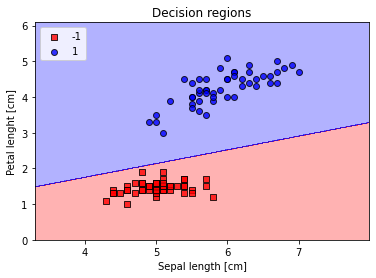

In [44]:
# Plotting decion regions
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal lenght [cm]')
plt.legend(loc = 'upper left')
plt.title("Decision regions")
plt.show()
